# Question 1 (Propositional Logic)

In [ ]:
from utils import *
from logic import *

## Wumpus World Environment

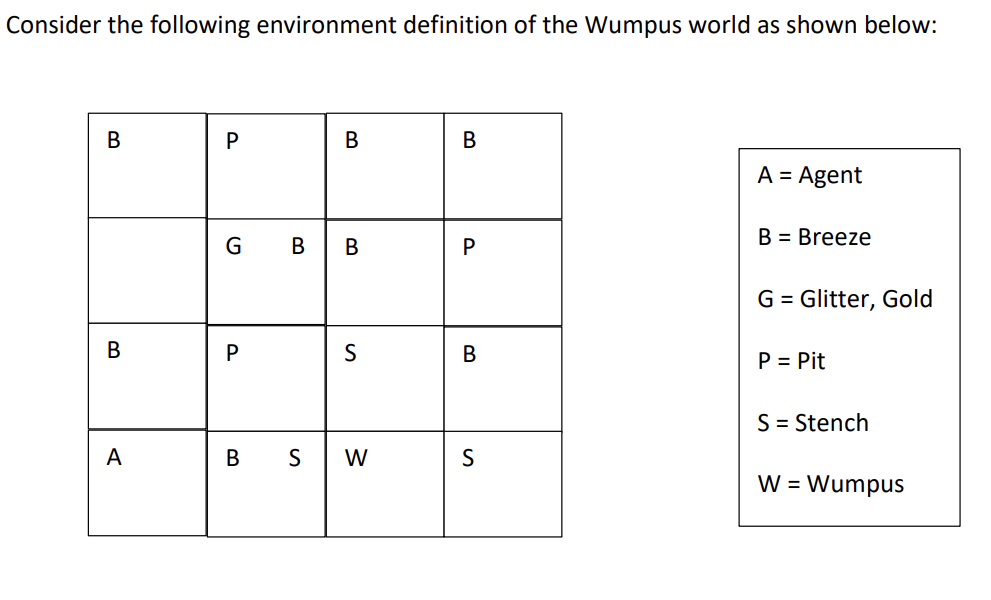

<center><b>Fig:1.1 - Diagram for the wumpus world</b></center>

Defining the clause

Defining the symbols we use in our clauses.<br/>
$P_{x, y}$ is true if there is a pit in `[x, y]`.<br/>
$S_{x, y}$ is true if the agent senses stench in `[x, y]`.<br/>
$B_{x, y}$ is true if the agent senses breeze in `[x, y]`.<br/>
$W_{x, y}$ is true if there is a wumpus in `[x, y]`.<br/>

In [ ]:
wumpus_kb = PropKB()

In [ ]:
P11, P12, P21, P22, P31, P13 = expr('P11, P12, P21, P22, P31, P13')
S11, S12, S21, S22, S31, S13 = expr('S11, S12, S21, S22, S31, S13')
B11, B12, B21, B22, B31, B13 = expr('B11, B12, B21, B22, B31, B13')
W11, W12, W21, W22, W31, W13 = expr('W11, W12, W21, W22, W31, W13')

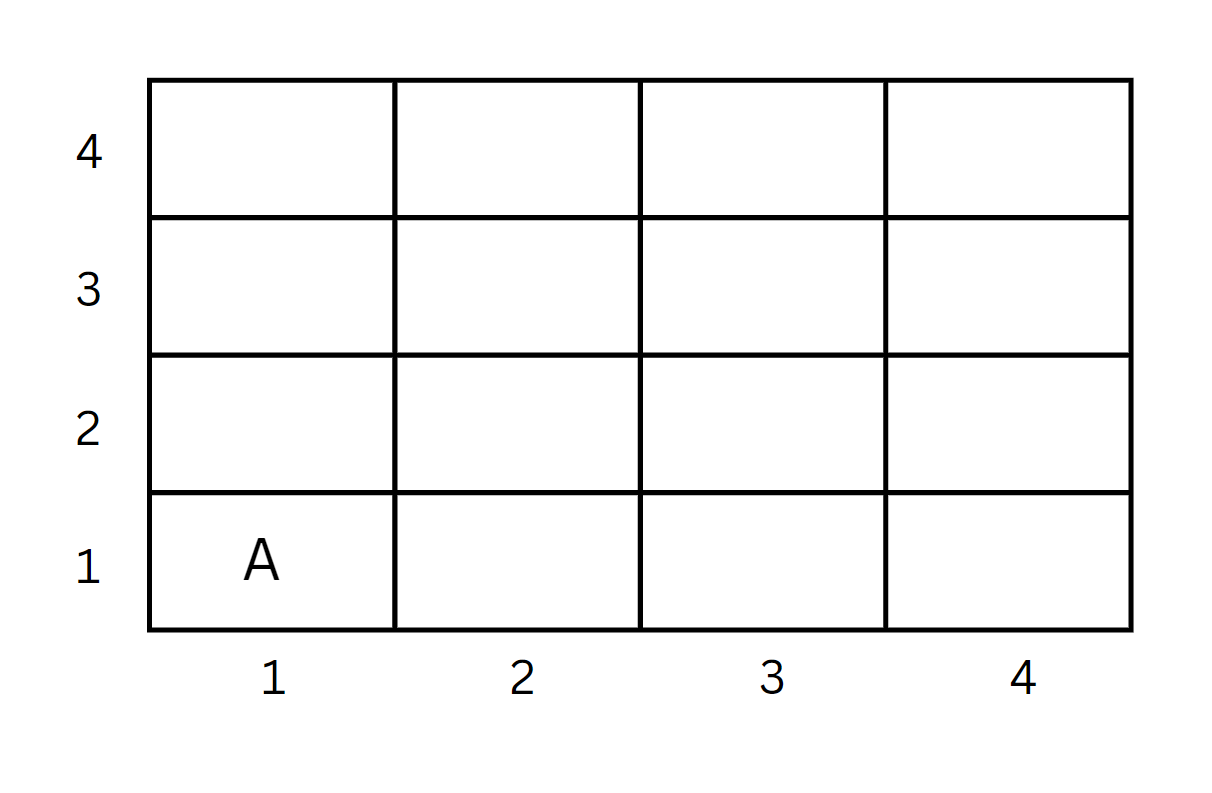


<center><b>Fig:1.2</b></center>


The game starts from (1, 1). Since the agent is in (1, 1), we can declare that there is nothing in the cell.

In [ ]:
#declaring no pits, breeze, stench and wumpus in (1, 1)
wumpus_kb.tell(~P11)
wumpus_kb.tell(~B11)
wumpus_kb.tell(~S11)
wumpus_kb.tell(~W11)

Assuming the agent moved to (2, 1). Now in (2, 1), we have a breeze and a stench. (refer Fig:1.1).

In [ ]:
# declaring stench and breeze in (2,1)
wumpus_kb.tell(B21)
wumpus_kb.tell(S21)
wumpus_kb.tell(~P21)
wumpus_kb.tell(~W21)

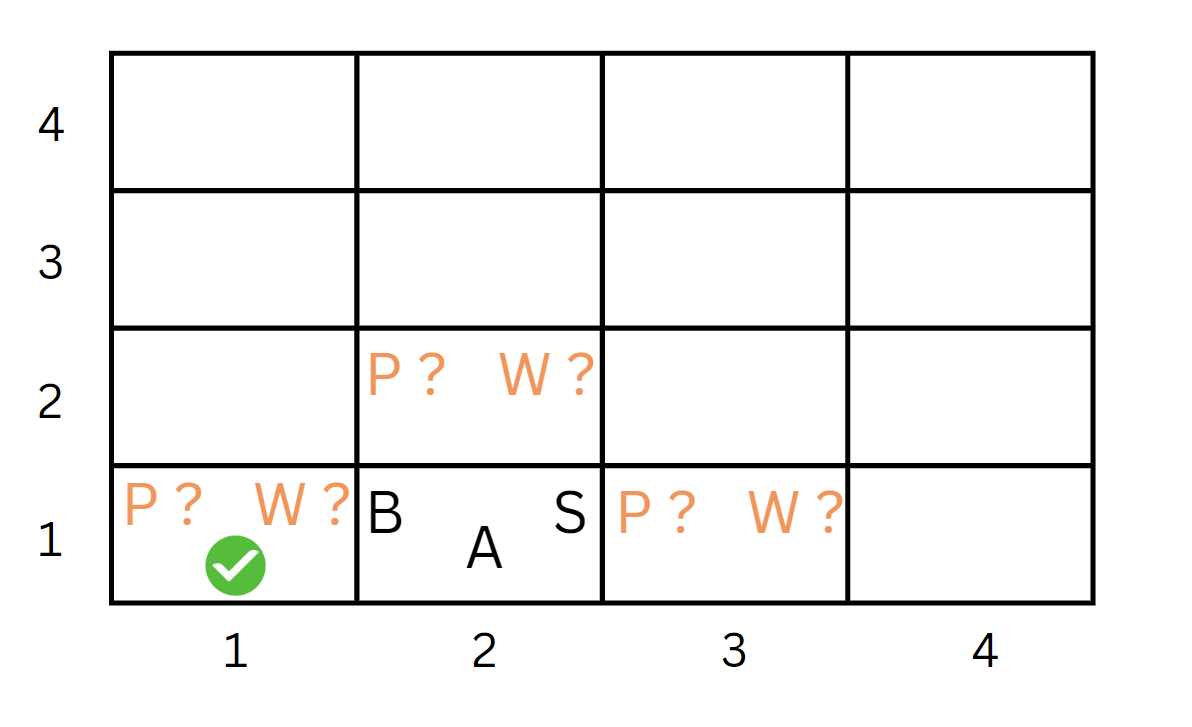


<center><b>Fig:1.3</b></center>


We know that, if a square is breezy then there is a pit in a neighboring square. Similarly, if a square is sensing stench then there is a wumpus in the neighboring square. 

This shows that, there could be a pit in (1, 1), (2, 2), (3, 1). Also, there could be a wumpus in either (1, 1), (2, 2), (3, 1).

In [ ]:
# Declaring rules for pit and wumpus
wumpus_kb.tell(B21 | '<=>' | (P11 | P22 | P31))
wumpus_kb.tell(S21 | '<=>' | (W11 | W22 | W31))

In [ ]:
#Checking the clauses
wumpus_kb.clauses

[~P11,
 ~B11,
 ~S11,
 ~W11,
 B21,
 S21,
 ~P21,
 ~W21,
 (~P11 | B21),
 (~P22 | B21),
 (~P31 | B21),
 (P11 | P22 | P31 | ~B21),
 (~W11 | S21),
 (~W22 | S21),
 (~W31 | S21),
 (W11 | W22 | W31 | ~S21)]

Lets ask the agent if its safe to move forward.

Possible Steps forward :
- (2, 2)
- (3, 1)

In [ ]:
wumpus_kb.ask_if_true(P22), wumpus_kb.ask_if_true(~P22) 

(False, False)

In [ ]:
wumpus_kb.ask_if_true(W22), wumpus_kb.ask_if_true(~W22) 

(False, False)

In [ ]:
wumpus_kb.ask_if_true(P31), wumpus_kb.ask_if_true(~P31) 

(False, False)

In [ ]:
wumpus_kb.ask_if_true(W31), wumpus_kb.ask_if_true(~W31) 

(False, False)

As you can see, the agent is not sure in any of the 2 cases for both pit and wumpus. There is not enough knowledge to infer an exact answer. So lets step back and try a new route : (1, 1) -> (1, 2)


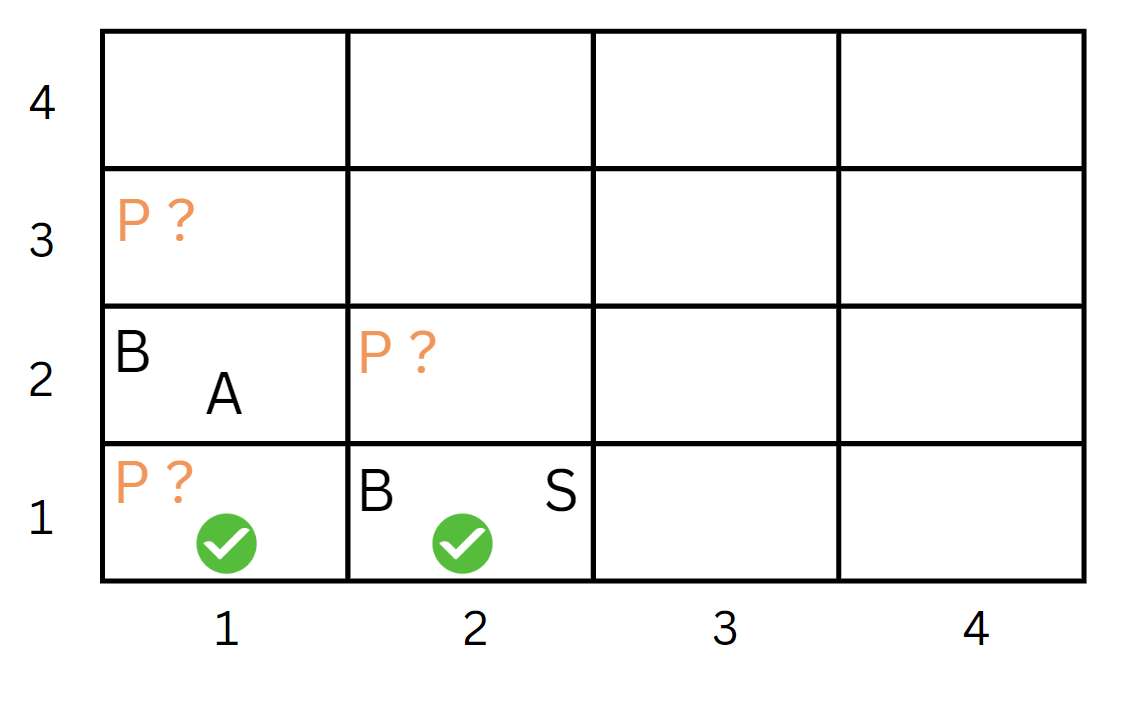

<center><b>Fig:1.4</b></center>
Now in (1, 2), we have a breeze (refer fig 1.1). This could suggest that there is a pit in (1, 3), (2, 2), (1, 1) or even in all of them (as multiple pits are possible).

In [ ]:
# Declaring breeze in (1, 2)
wumpus_kb.tell(B12)
wumpus_kb.tell(~W12)
wumpus_kb.tell(~P12)
wumpus_kb.tell(~S12)

This means that (1, 3) has nothing and (2, 2) has a pit and vice versa or both have a pit.

This could mean:
- (1, 3) is empty and (2, 2) is pit.
- (2, 2) is empty and (1, 3) is pit.
- Both (1, 3) and (2, 2) is having pit.

In [ ]:
wumpus_kb.tell(B12 | '<=>' | (P13 | P22 | P11))

In [ ]:
wumpus_kb.tell(S12 | '<=>' | (W13 | W22 | W11))

As you can see, (1, 2) helped the agent to eliminate W22 confirming there is a wumpus in (3, 1).

In [ ]:
# checking wumpus in (3, 1)
wumpus_kb.ask_if_true(W31), wumpus_kb.ask_if_true(~W31)

(True, False)

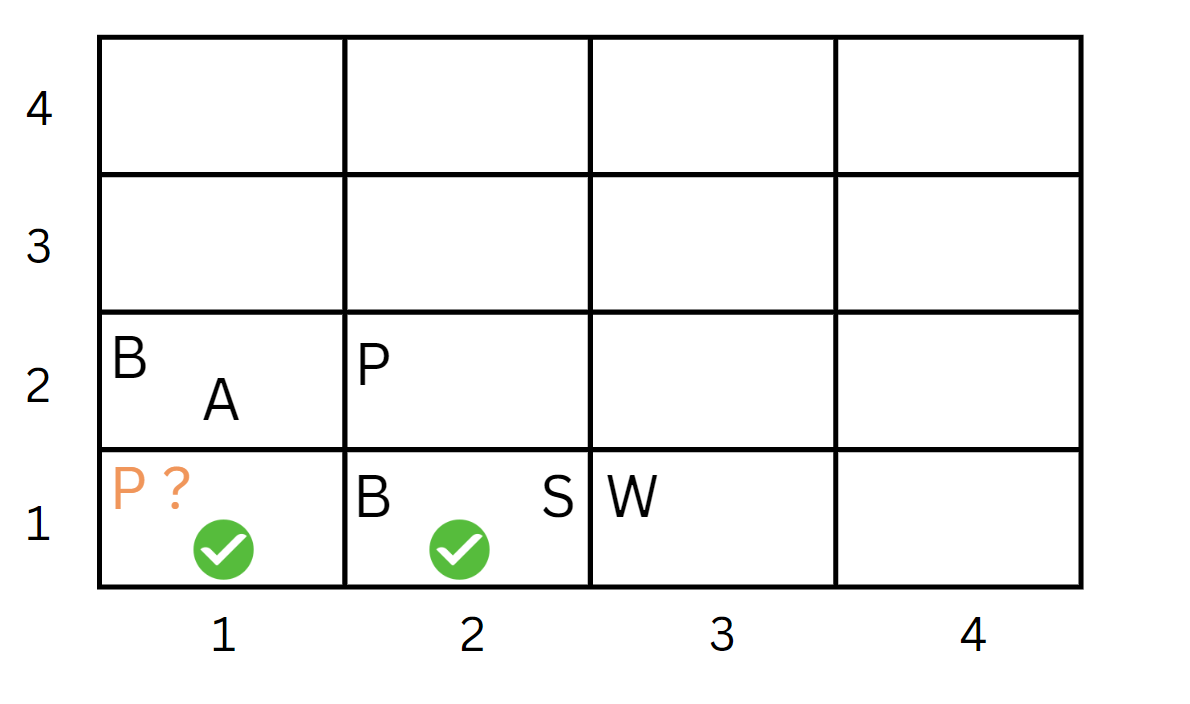

<center><b>Fig:1.5</b></center>

We have found the wumpus in (3,1). Since there cannot be more than one wumpus in an environment; we can confirm that W31 is True.

In [ ]:
# Checking updated clause
wumpus_kb.clauses

[~P11,
 ~B11,
 ~S11,
 ~W11,
 B21,
 S21,
 ~P21,
 ~W21,
 (~P11 | B21),
 (~P22 | B21),
 (~P31 | B21),
 (P11 | P22 | P31 | ~B21),
 (~W11 | S21),
 (~W22 | S21),
 (~W31 | S21),
 (W11 | W22 | W31 | ~S21),
 B12,
 ~W12,
 ~P12,
 ~S12,
 (~P13 | B12),
 (~P22 | B12),
 (~P11 | B12),
 (P13 | P22 | P11 | ~B12),
 (~W13 | S12),
 (~W22 | S12),
 (~W11 | S12),
 (W13 | W22 | W11 | ~S12)]

Since there is only one wumpus, we need to add those rules to the agent.

In [ ]:
# Considering 6 positions
wList = ['W11', 'W12', 'W21', 'W22', 'W31', 'W13']

In [ ]:
# there is at most one wumpus
# print('wumpus_kb.tell((' + '|'.join(wList)+'))')
exec('wumpus_kb.tell((' + '|'.join(wList)+'))')

wumpus_kb.tell((W11|W12|W21|W22|W31|W13))


In [ ]:
for i in range(len(wList)):
    for j in range(len(wList)):
        if i < j:
            exec('wumpus_kb.tell((~' + wList[i] + '| ~' + wList[j] + '))')

In [ ]:
print(wumpus_kb.ask_if_true(W11), wumpus_kb.ask_if_true(~W11))
print(wumpus_kb.ask_if_true(W12), wumpus_kb.ask_if_true(~W12))
print(wumpus_kb.ask_if_true(W21), wumpus_kb.ask_if_true(~W21))
print(wumpus_kb.ask_if_true(W22), wumpus_kb.ask_if_true(~W22))
print(wumpus_kb.ask_if_true(W31), wumpus_kb.ask_if_true(~W31))
print(wumpus_kb.ask_if_true(W13), wumpus_kb.ask_if_true(~W13))

False True
False True
False True
False True
True False
False True
